# CPS600 - Python Programming for Finance 
###  
<img src="https://www.syracuse.edu/wp-content/themes/g6-carbon/img/syracuse-university-seal.svg?ver=6.3.9" style="width: 200px;"/>

# Lab: Method of Moments

###  October 9, 2018

Today we are going to do some exercises in the method of moments. Let's start with a normal distribution example, cheating a little bit.

Let's start with a basic visualization.

In [ ]:
#Import for your convenience.
import pandas as pd

# Imports for stats
import numpy as np
import scipy.special

# Imports for plotting
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_notebook

# Outputting in the notebook.
output_notebook()

# First of four figures
p1 = figure(title="Normal Distribution (μ=0, σ=0.5)",tools="save",
            background_fill_color="#E8DDCB")

#Parameters for the normal distribution
mu, sigma = 0, 0.5

measured = np.random.normal(mu, sigma, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(-2, 2, 1000)
pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2

p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p1.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p1.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p1.legend.location = "center_right"
p1.legend.background_fill_color = "darkgrey"
p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = 'Pr(x)'


#Second of four figures
p2 = figure(title="Log Normal Distribution (μ=0, σ=0.5)", tools="save",
            background_fill_color="#E8DDCB")

#Parameters
mu, sigma = 0, 0.5

measured = np.random.lognormal(mu, sigma, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 8.0, 1000)
pdf = 1/(x* sigma * np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((np.log(x)-mu)/(np.sqrt(2)*sigma)))/2

p2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p2.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p2.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p2.legend.location = "center_right"
p2.legend.background_fill_color = "darkgrey"
p2.xaxis.axis_label = 'x'
p2.yaxis.axis_label = 'Pr(x)'


# Third
p3 = figure(title="Gamma Distribution (k=1, θ=2)", tools="save",
            background_fill_color="#E8DDCB")

# Parameters
k, theta = 1.0, 2.0

measured = np.random.gamma(k, theta, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 20.0, 1000)
pdf = x**(k-1) * np.exp(-x/theta) / (theta**k * scipy.special.gamma(k))
cdf = scipy.special.gammainc(k, x/theta) / scipy.special.gamma(k)

p3.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p3.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p3.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p3.legend.location = "center_right"
p3.legend.background_fill_color = "darkgrey"
p3.xaxis.axis_label = 'x'
p3.yaxis.axis_label = 'Pr(x)'


# Fourth
p4 = figure(title="Weibull Distribution (λ=1, k=1.25)", tools="save",
            background_fill_color="#E8DDCB")

# Parameters
lam, k = 1, 1.25

measured = lam*(-np.log(np.random.uniform(0, 1, 1000)))**(1/k)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 8, 1000)
pdf = (k/lam)*(x/lam)**(k-1) * np.exp(-(x/lam)**k)
cdf = 1 - np.exp(-(x/lam)**k)

p4.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="#036564", line_color="#033649")
p4.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p4.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p4.legend.location = "center_right"
p4.legend.background_fill_color = "darkgrey"
p4.xaxis.axis_label = 'x'
p4.yaxis.axis_label = 'Pr(x)'


show(gridplot(p1,p2,p3,p4, ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

This is a very rich example. Let's look at each one of these distributions to understand what is going on.
1. [Normal](https://en.wikipedia.org/wiki/Normal_distribution)
2. [Log Normal](https://en.wikipedia.org/wiki/Log-normal_distribution)
3. [Gamma](https://en.wikipedia.org/wiki/Gamma_distribution)
4. [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution)

**Exercise 1**

Work out the parameter estimates for the *Gamma* distribution.

***Answer:***

Given a random sample with mean $\bar{x}$ and standard deviation $s$, the parameter estimate for *Gamma* distribution is: 
$$ \hat{\alpha} = (\frac{\bar{x}}{s})^2 $$
$$ \hat{\theta} = \frac{s^2}{\bar{x}} $$

In [91]:
def paramGamma(x):
    theta = np.std(x)**2/np.mean(x)
    alpha = (np.mean(x)/np.std(x))**2
    return theta, alpha

**Exercise 2**

Work out the parameter estimates for the *Weibull* distribution.

***Answer:***

(18.964794494491834, 0.2422200464608868, 4.737923965228752)
(20.22404547014895, -0.06659437063949081, 5.047185445169632)


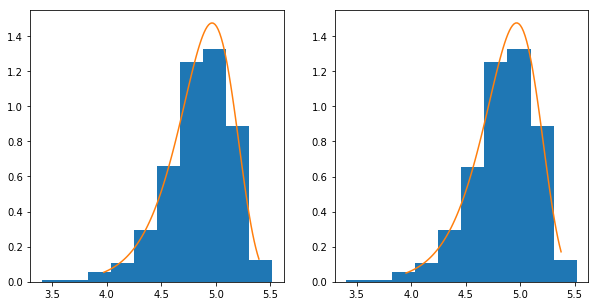

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

Lambda = 5.  # Scale parameter of Weibull distribution
k = 20.      # Shape parameter of Weibull distribution
measured = Lambda*np.random.weibull(k,1000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(measured, density=True)
result = weibull_min.fit(measured, k, loc=0, scale=Lambda)
#result = weibull_min.fit(measured, loc=0)
print(result)
x = np.linspace(weibull_min.ppf(0.01, k, loc=0, scale=Lambda),
                weibull_min.ppf(0.99, k, loc=0, scale=Lambda), 100)
ax1.plot(x, weibull_min.pdf(x, *result))

# Note: The subplot above is just an example. Because we actually do not know real lambda and k, 
# these parameters can be omitted in fit() method. 
ax2.hist(measured, density=True)
#result = weibull_min.fit(measured, k, loc=0, scale=Lambda)
result = weibull_min.fit(measured, loc=0)
print(result)
x = np.linspace(weibull_min.ppf(0.01, *result),
                weibull_min.ppf(0.99, *result), 100)
ax2.plot(x, weibull_min.pdf(x, *result))
plt.show()

**Exercise 3**

Load the CSV file provided. Plot a histogram for each column. Guess which of the four families we discussed generated each column (you don't get to do this IRL). Using your guess and your parameter formulas, plot the appropriate PDF an CDF functions for each column.

***Answer:***

In [1]:
import math
import pandas as pd
import numpy as np
import scipy.special
#from scipy.optimize import fsolve

# Imports for plotting
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_notebook

output_notebook()

df = pd.read_csv('distroCSV.csv')

hist, edges = np.histogram(df.distro1.values, density=True, bins=50)
q1 = figure(title="distro1",tools="save",
            background_fill_color="#E8DDCB")
q1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")

hist, edges = np.histogram(df.distro2.values, density=True, bins=100)
q2 = figure(title="distro2",tools="save",
            background_fill_color="#E8DDCB")
q2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")

hist, edges = np.histogram(df.distro3.values, density=True, bins=100)
q3 = figure(title="distro3",tools="save",
            background_fill_color="#E8DDCB")
q3.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")

hist, edges = np.histogram(df.distro4.values, density=True, bins=100)
q4 = figure(title="distro4",tools="save",
            background_fill_color="#E8DDCB")
q4.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")

show(gridplot(q1,q2,q3,q4, ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

Column $distro2$ of the CSV file suggests that a log transformation would be appropriate.

In [2]:
logDistro2 = np.log(df.distro2.values)
hist, edges = np.histogram(logDistro2, density=True, bins=50)
q5 = figure(title="log transform of distro2",tools="save",
            background_fill_color="#E8DDCB", plot_width=400, plot_height=300)
q5.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
show(q5)

This figure looks like normal distribution. The qqplot of the log transformed data also strongly suggests a normal distribution:

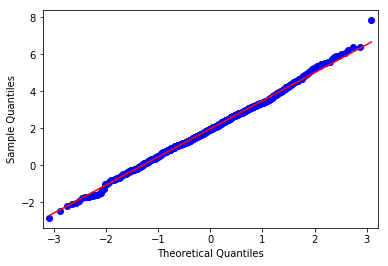

In [4]:
%matplotlib inline
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(logDistro2, line='s')
pyplot.show()

Guess: $distro1$ follows normal distribution. $distro2$ follows Log-normal distribution. $distro3$ follows Gamma distribution. $distro4$ follows Weibull distribution.

In [90]:
from scipy import stats

distro1 = df['distro1']
distro2 = df['distro2']
distro3 = df['distro3']
distro4 = df['distro4']
d1_std, d2_std, d3_std, d4_std = (np.std(np.array(distro1)),
                               np.std(np.array(distro2)),   
                               np.std(np.array(distro3)),
                               np.std(np.array(distro4)))
                               
d1_avg, d2_avg, d3_avg, d4_avg = (np.mean(np.array(distro1)),
                                  np.mean(np.array(distro2)),
                                  np.mean(np.array(distro3)),
                                  np.mean(np.array(distro4)))

print("parameters of distro1, normal distribution:","sigma:",d1_std,"mu:",d1_avg)
sigma, mu = d1_std, d1_avg
x = np.linspace(-2, 4.5, 1000)

hist, edges = np.histogram(distro1.values, density=True, bins=50)
# pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
# cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2
pdf = scipy.stats.norm.pdf(x, loc=mu, scale=sigma)
cdf = scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

q6 = figure(title="distro1: normal distribution",tools="save",
            background_fill_color="#E8DDCB", plot_width=400, plot_height=300)
q6.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="#036564", line_color="#033649")
q6.line(x, pdf, line_color="#D95B43", line_width=4, alpha=0.7, legend="PDF")
q6.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

q6.legend.location = "center_right"
q6.legend.background_fill_color = "darkgrey"
q6.xaxis.axis_label = 'x'
q6.yaxis.axis_label = 'Pr(x)'

#show(q6)


# parameter estimate for lognormal distribution
logDistro2 = np.log(df.distro2.values)
mu, sigma = np.mean(logDistro2), np.std(logDistro2)
print("parameters of distro2, log-normal distribution:","sigma:",
      sigma,"mu:",
      mu)

# Too ugly to draw everything, cut <40
d2_cut = distro2[distro2<40]
x = np.linspace(0., 40., 1000)
# The following code does not work as good as scipy pdf & cdf function.
# pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
# cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2
pdf = stats.lognorm.pdf(x, s=sigma, scale=math.exp(mu))
cdf = stats.lognorm.cdf(x, s=sigma, scale=math.exp(mu))

hist, edges = np.histogram(d2_cut.values, density=True, bins=80)
q7 = figure(title="distro2: log-normal distribution",tools="save",
            background_fill_color="#E8DDCB")
q7.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
q7.line(x, pdf, line_color="#D95B43", line_width=4, alpha=0.7, legend="PDF")
q7.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

q7.legend.location = "center_right"
q7.legend.background_fill_color = "darkgrey"
q7.xaxis.axis_label = 'x'
q7.yaxis.axis_label = 'Pr(x)'

#show(q7)


theta = d3_std**2/d3_avg
k = d3_avg/theta
print("parameters of distro3, gamma distribution:","k:",k,"theta:",theta)

x = np.linspace(0.01, 4.0, 1000)
# The following code does not work well when shape parameter is small. Use scipy.stats.gamma instead.
# pdf = x**(k-1) * np.exp(-x/theta) / (theta**k * scipy.special.gamma(k))
# cdf = scipy.special.gammainc(k, x/theta) / scipy.special.gamma(k)
pdf = stats.gamma.pdf(x,k,scale=theta)
cdf = stats.gamma.cdf(x,k,scale=theta)

hist, edges = np.histogram(distro3.values, density=True, bins=50)
q8 = figure(title="distro3: gamma distribution", tools="save",
            background_fill_color="#E8DDCB")
q8.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
q8.line(x, pdf, line_color="#D95B43", line_width=5, alpha=0.7, legend="PDF")
q8.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

q8.legend.location = "center_right"
q8.legend.background_fill_color = "darkgrey"
q8.xaxis.axis_label = 'x'
q8.yaxis.axis_label = 'Pr(x)'

#show(q8)


result = stats.weibull_min.fit(distro4, loc=0)
print('parameters of distro4, weibull distribution: lambda:',result[2],'k:',result[0])
x = np.linspace(0.001,3., 1000)

lam, k = result[2], result[0]

pdf = (k/lam)*(x/lam)**(k-1) * np.exp(-(x/lam)**k)
cdf = 1 - np.exp(-(x/lam)**k)

hist, edges = np.histogram(distro4.values, density=True, bins=50)
q9 = figure(title="distro4: Weibull distribution", tools="save",
            background_fill_color="#E8DDCB")
q9.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
q9.line(x, pdf, line_color="#D95B43", line_width=5, alpha=0.7, legend="PDF")
q9.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

q9.legend.location = "center_right"
q9.legend.background_fill_color = "darkgrey"
q9.xaxis.axis_label = 'x'
q9.yaxis.axis_label = 'Pr(x)'

#show(q9)
show(gridplot(q6,q7,q8,q9, ncols=2, plot_width=400, plot_height=400))

parameters of distro1, normal distribution: sigma: 1.0264711046684125 mu: 0.9951602680401787
parameters of distro2, log-normal distribution: sigma: 1.517543742995267 mu: 1.9722945520423396
parameters of distro3, gamma distribution: k: 0.52409319188858 theta: 0.9480132305932996
parameters of distro4, weibull distribution: lambda: 0.8146962377091411 k: 1.4845495776021638
